# Aritificial intelligence assignment 2024

In [68]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [69]:
# Parameters
img_height, img_width = 28, 28
batch_size = 32

# Pad naar dataset
dataset_path = './dataset_short'

In [70]:
# Data generators
datagen = ImageDataGenerator(rescale=(1 / 255), validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    color_mode='grayscale',
    subset='validation'
)

Found 96 images belonging to 4 classes.
Found 23 images belonging to 4 classes.


In [71]:
# Model bouwen
# model = Sequential([
#    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#    MaxPooling2D((2, 2)),
#    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#    MaxPooling2D((2, 2)),
#    Flatten(),
#    Dense(128, activation='relu'),
#    Dense(train_generator.num_classes, activation='softmax')
#])

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [72]:
# Model trainen
epochs = 12

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/12
3/3 [==============================] - 1s 145ms/step - loss: 1.6932 - accuracy: 0.2500 - val_loss: 1.3756 - val_accuracy: 0.3043
Epoch 2/12
3/3 [==============================] - 0s 42ms/step - loss: 1.3985 - accuracy: 0.2708 - val_loss: 1.3639 - val_accuracy: 0.3913
Epoch 3/12
3/3 [==============================] - 0s 43ms/step - loss: 1.3576 - accuracy: 0.3750 - val_loss: 1.3153 - val_accuracy: 0.5217
Epoch 4/12
3/3 [==============================] - 0s 43ms/step - loss: 1.2910 - accuracy: 0.4479 - val_loss: 1.2775 - val_accuracy: 0.7391
Epoch 5/12
3/3 [==============================] - 0s 43ms/step - loss: 1.2324 - accuracy: 0.8854 - val_loss: 1.2441 - val_accuracy: 0.7826
Epoch 6/12
3/3 [==============================] - 0s 56ms/step - loss: 1.1877 - accuracy: 0.8750 - val_loss: 1.1958 - val_accuracy: 0.6522
Epoch 7/12
3/3 [==============================] - 0s 47ms/step - loss: 1.1161 - accuracy: 0.8958 - val_loss: 1.1475 - val_accuracy: 0.8261
Epoch 8/12
3/3 [==========

In [73]:
# Model evalueren
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test nauwkeurigheid: {test_accuracy:.4f}")

1/1 [==============================] - 0s 56ms/step - loss: 0.9117 - accuracy: 0.8696
Test nauwkeurigheid: 0.8696


In [74]:
# Modelgrootte berekenen
model_size = model.count_params()
model_memory = model_size * 4 / (1024 ** 2)  # 4 bytes per 32-bit float
print(f"Modelgrootte: {model_memory:.2f} MB")

Modelgrootte: 2.64 MB


In [75]:
# Voorspellingen maken en verwarringsmatrix berekenen
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
print("Verwarringsmatrix:")
print(cm)

1/1 [==============================] - 0s 117ms/step
Verwarringsmatrix:
[[2 2 1 1]
 [3 1 1 1]
 [1 1 1 2]
 [1 2 1 2]]


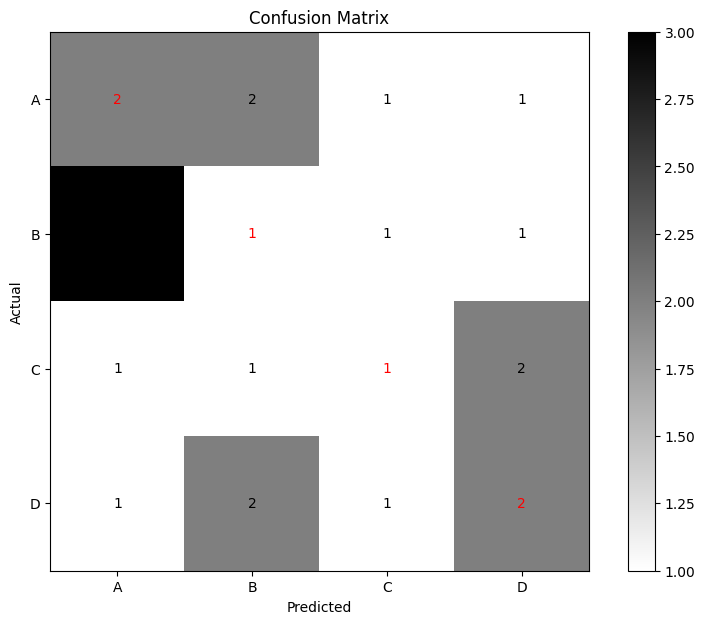

In [76]:
# Functie om cijfers naar letters om te zetten
def number_to_letter(n):
    return chr(n + ord('A'))

# Maak een lijst van letters voor de labels
labels = [number_to_letter(i) for i in range(26)]

# Omzetten naar pandas DataFrame met letters als labels
cm_df = pd.DataFrame(cm, index=labels[:len(np.unique(y_true))], columns=labels[:len(np.unique(y_true))])

# Functie om de celkleur aan te passen
def annotate_heatmap(data, row_labels, col_labels, ax=None,
                     cbar_kw=None, cbarlabel="", **kwargs):
    if not ax:
        ax = plt.gca()

    cbar_kw = cbar_kw or {}
    im = ax.imshow(data, **kwargs)

    # Markeer de hoofddiagonaal
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            color = 'red' if i == j else 'black'
            ax.text(j, i, format(data[i, j], 'd'),
                    ha="center", va="center",
                    color=color)
    
    return im

# Plot de heatmap met aangepaste annotaties
fig, ax = plt.subplots(figsize=(10, 7))
im = annotate_heatmap(cm, labels[:len(np.unique(y_true))], labels[:len(np.unique(y_true))],
                      ax=ax, cmap='binary')

# We zetten de labels en titel
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Zorg ervoor dat de labels correct worden ingesteld
ax.set_xticks(np.arange(cm.shape[1]))
ax.set_yticks(np.arange(cm.shape[0]))
ax.set_xticklabels(labels[:len(np.unique(y_true))])
ax.set_yticklabels(labels[:len(np.unique(y_true))])

plt.colorbar(im, ax=ax)
plt.show()

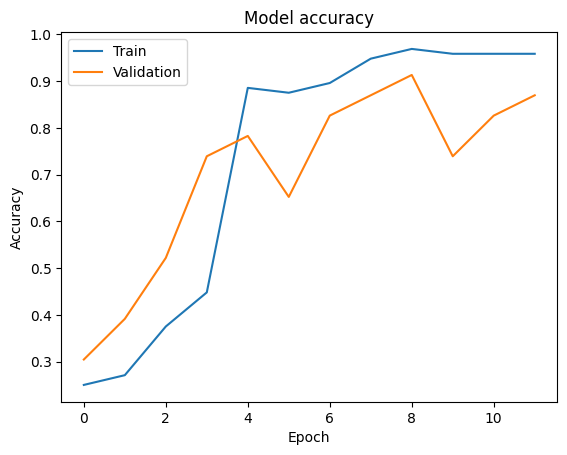

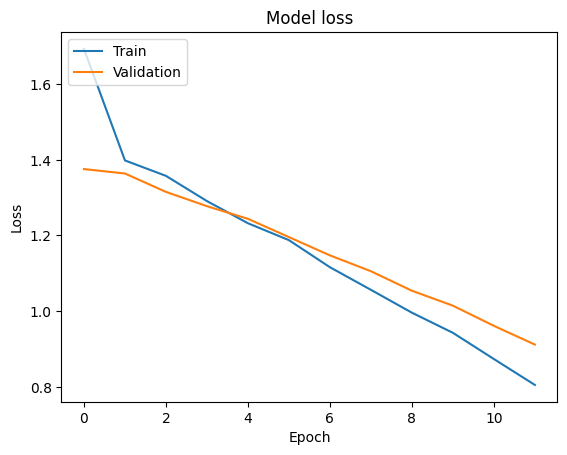

In [77]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()